In [3]:
from src import load_data
from src import embeddings

df_b, df_r = load_data.load_yelp_data()
df_b.head()
df_r.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,latitude,longitude
0,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,39.952103,-75.172753
1,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,40.079848,-75.025080
2,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31,39.938013,-75.148131
3,8JFGBuHMoiNDyfcxuWNtrA,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4,0,0,0,Good food--loved the gnocchi with marinara\nth...,2009-10-14 19:57:14,39.949529,-75.152139
4,oyaMhzBSwfGgemSGuZCdwQ,Dd1jQj7S-BFGqRbApFzCFw,YtSqYv1Q_pOltsVPSx54SA,5,0,0,0,Tremendous service (Big shout out to Douglas) ...,2013-06-24 11:21:25,39.948949,-75.169532


In [4]:
import numpy as np
import pandas as pd
import math
from src import maps

df = pd.read_csv("data/df_b_processed.csv")
df = df.drop_duplicates()

mile_distance = 2

df.drop('hours',axis=1)

def local_businesses(dataset, latitude, longitude, miles):
    # latitude and longitude define the center of the station, miles designates 
    # how big of a circle/area you want to draw around the station
    rows=[]
    for index in range(len(dataset)):
        lat=dataset.loc[index]['latitude']
        long=dataset.loc[index]['longitude']
        distance = maps.dist(lat,long,latitude,longitude)
        if distance < miles:
            rows.append(dataset.iloc[index])
    return pd.DataFrame(rows).reset_index(drop=True)
df_located = (local_businesses(df_r,40.02,-75.16,mile_distance))
df_located.head()


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,latitude,longitude
0,WwdgjZvARA-p7IU4I4Iqbw,1cFrIQsRvzrsqn-1zs_0Fg,_IYHl6J9iB3lbeJq27pbsg,5,1,0,0,I've been to this place in numerous occasions ...,2015-08-30 17:20:47,40.022020,-75.124061
1,Lo2giVeSNDvatEAGZRikWQ,YwMD-AVT67fmYRGxnlRSPA,alUk6OwNhofyc90NDMDY-Q,5,7,1,0,Was taken here today by a Colombian friend who...,2010-08-22 01:54:23,40.023288,-75.123764
2,jL-J_SB3JZZSjjbKa0h2gw,h9CC0vN_58Dz70LYEGFV8g,3VKE0_-KhU_qMYHxcyVcDg,1,1,0,0,Took forever to deliver and I am just blocks a...,2017-03-03 19:54:47,40.029648,-75.132293
3,Px520jxe7vcVanc3wMQZJQ,3r0H5dsSPYmetmwQF9WxbA,BWITd9JUXP3gSi1z3Y-z8g,5,0,0,0,Top notch food. I ordered the 3 course meal an...,2017-12-16 03:25:23,40.007875,-75.192407
4,GQT_d1WWybpP6u1xpchW8A,pbm9st-olYQ3n5S4VcNIEQ,0WIlsDUUFuUKcDfJPaHRkA,5,3,0,2,My care at Temple has been so great that I am ...,2016-01-04 12:56:23,40.005424,-75.150720


In [7]:
df_located.sort_values('date')
df_located['date']=pd.to_datetime(df_located['date'])
df_located['year']=df_located['date'].dt.year
df_located.head()
# yeared= local_businesses['date'].dt.year


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,latitude,longitude,year
0,WwdgjZvARA-p7IU4I4Iqbw,1cFrIQsRvzrsqn-1zs_0Fg,_IYHl6J9iB3lbeJq27pbsg,5,1,0,0,I've been to this place in numerous occasions ...,2015-08-30 17:20:47,40.022020,-75.124061,2015
1,Lo2giVeSNDvatEAGZRikWQ,YwMD-AVT67fmYRGxnlRSPA,alUk6OwNhofyc90NDMDY-Q,5,7,1,0,Was taken here today by a Colombian friend who...,2010-08-22 01:54:23,40.023288,-75.123764,2010
2,jL-J_SB3JZZSjjbKa0h2gw,h9CC0vN_58Dz70LYEGFV8g,3VKE0_-KhU_qMYHxcyVcDg,1,1,0,0,Took forever to deliver and I am just blocks a...,2017-03-03 19:54:47,40.029648,-75.132293,2017
3,Px520jxe7vcVanc3wMQZJQ,3r0H5dsSPYmetmwQF9WxbA,BWITd9JUXP3gSi1z3Y-z8g,5,0,0,0,Top notch food. I ordered the 3 course meal an...,2017-12-16 03:25:23,40.007875,-75.192407,2017
4,GQT_d1WWybpP6u1xpchW8A,pbm9st-olYQ3n5S4VcNIEQ,0WIlsDUUFuUKcDfJPaHRkA,5,3,0,2,My care at Temple has been so great that I am ...,2016-01-04 12:56:23,40.005424,-75.150720,2016


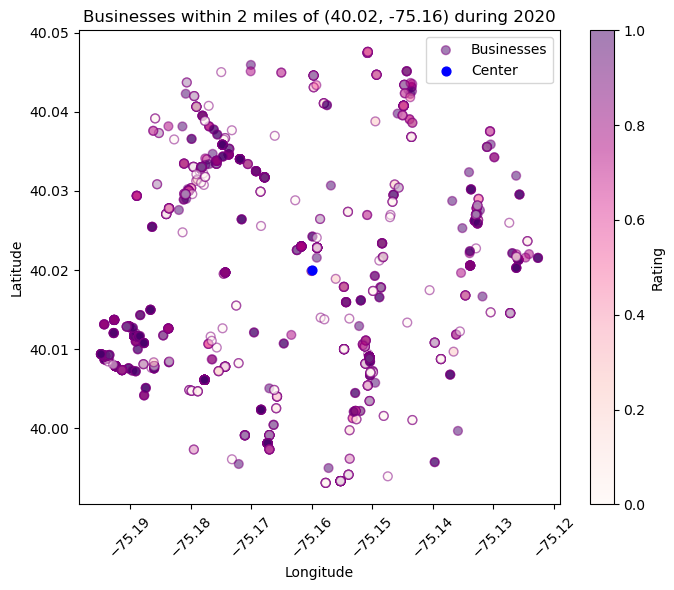

In [8]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_businesses(df_local,latitude, longitude, miles,date=None):
    if date != None:
        df_local = df_local[df_local['year']==date].copy()
    if 'stars' not in df_local.columns:
        df_local['stars']=0.0
    df_local['stars']=df_local['stars'].fillna(0.0)   
    stars = df_local['stars'] 
    norm = (stars -stars.min())/(stars.max()-stars.min()+1e-10)
    
    fig,ax = plt.subplots(figsize=(7,6))
    scatter = ax.scatter(df_local['longitude'],df_local['latitude'],c=norm,s=40,cmap='RdPu',label='Businesses',alpha=0.5,edgecolors='purple')
    ax.scatter(x=longitude,y=latitude,color='blue',marker='o',s=40,label = 'Center')
    fig.colorbar(scatter,label='Rating')
    ax.tick_params(axis='x', labelrotation=45)  
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f"Businesses within {miles} miles of ({latitude}, {longitude}) during {date}")
    ax.legend()
    plt.tight_layout()
    plt.show()
(plot_businesses(df_located,40.02,-75.16,mile_distance,date=2020))

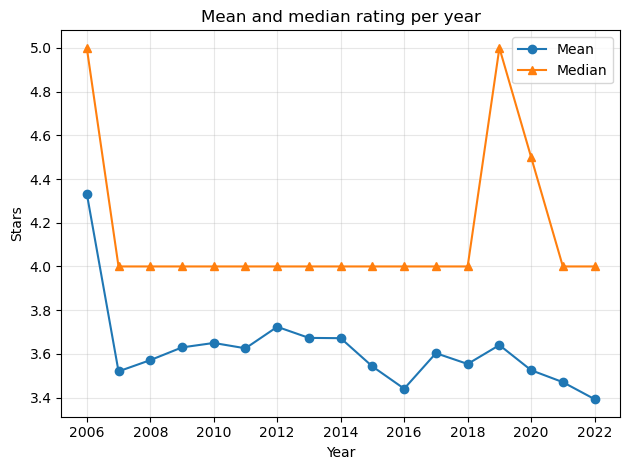

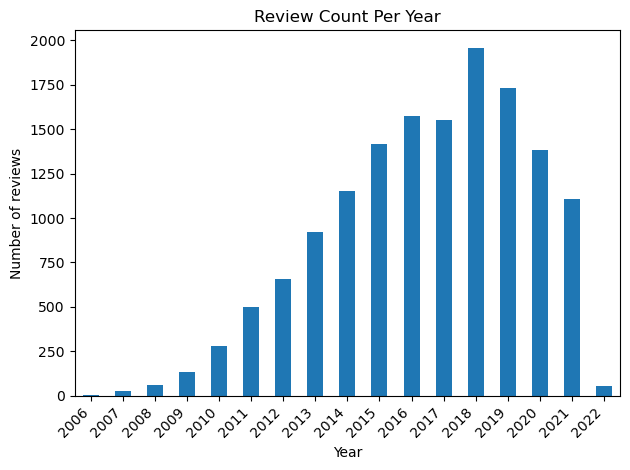

In [9]:
#Graph Overall ratings among communities.
df_located = df_located.sort_values('year')
df_located.head()



#Graph review average/median per year
df_drop=df_located.dropna(subset=['stars'], inplace=False).copy()
df_drop.dropna(subset=['year'], inplace=True)

yearly_stats=df_drop.groupby('year')['stars'].agg(mean='mean',median='median')
plt.plot(yearly_stats.index,yearly_stats['mean'],marker='o',label='Mean')
plt.plot(yearly_stats.index,yearly_stats['median'],marker='^',label='Median')
plt.xlabel('Year')
plt.ylabel('Stars')
plt.title('Mean and median rating per year')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#graph number of reviews (don't drop)
review_counts = df_located.groupby('year').size()
review_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.title('Review Count Per Year')
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()



In [ ]:
# --- LDA topic modeling pipeline -------------------------------------------
import pandas as pd
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import spacy
from spacy.util import is_package
import re
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------------
# 0. Setup text + stopwords
# ---------------------------------------------------------------------------
nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))

df_data = df_located.copy()


# target_years = [2011, 2012, 2013,2014,2015]
target_years = [2018, 2019, 2020,2021,2022]
df_data = df_data[df_data['year'].isin(target_years)]


# Replace NaN with empty strings so downstream string ops don't error
df_data['text'] = df_data['text'].fillna("")

# ---------------------------------------------------------------------------
# 1. Basic cleaning
# ---------------------------------------------------------------------------
_clean_re_whitespace   = re.compile(r'\s+')
_clean_re_emails       = re.compile(r'\S*@\S*\s?')
_clean_re_apostrophe   = re.compile(r"\'")
_clean_re_nonletters   = re.compile(r'[^a-zA-Z]')

def preprocess_text(text: str) -> str:
    text = _clean_re_emails.sub(' ', text)
    text = _clean_re_apostrophe.sub('', text)
    text = _clean_re_nonletters.sub(' ', text)
    text = _clean_re_whitespace.sub(' ', text)
    return text.lower().strip()

df_data['cleaned_text'] = df_data['text'].map(preprocess_text)

# ---------------------------------------------------------------------------
# 2. Tokenize (light) with gensim helper + stopword filter
# ---------------------------------------------------------------------------
def tokenize(text: str):
    tokens = gensim.utils.simple_preprocess(text, deacc=True)  # keeps >=2 char alpha tokens
    return [t for t in tokens if t not in stop_words]

df_data['tokens'] = df_data['cleaned_text'].map(tokenize)

# ---------------------------------------------------------------------------
# 3. Load / fall back spaCy for lemmatization
# ---------------------------------------------------------------------------
def load_spacy_model(model_name: str = "en_core_web_sm"):
    """
    Try to load `model_name`. If it isn't installed, attempt to download it.
    On failure, fall back to a blank English pipeline so the rest of the
    notebook can still run (tokenizer only, limited or no lemmatization).
    """
    try:
        # First attempt: just load it
        return spacy.load(model_name, disable=["parser", "ner", "textcat"])
    except OSError:
        # Not installed – try to download
        try:
            from spacy.cli import download as spacy_download
            spacy_download(model_name)
            return spacy.load(model_name, disable=["parser", "ner", "textcat"])
        except Exception as e:
            print(
                f"⚠️  Could not download spaCy model '{model_name}' "
                f"(reason: {e}). Falling back to blank English; "
                "lemmatization will be limited."
            )
            return spacy.blank("en")  # tokenizer only
nlp = load_spacy_model()

# ---------------------------------------------------------------------------
# 4. Lemmatize in batches (faster than row-by-row)
# ---------------------------------------------------------------------------
def iter_token_strs(series):
    # join token list back into a string for spaCy
    for toks in series:
        yield " ".join(toks)

lemmas = []
for doc in nlp.pipe(iter_token_strs(df_data['tokens']), batch_size=500, n_process=1):
    # If the pipeline has no tagger/lemmatizer, lemma_ may equal token.text
    lemmas.append([t.lemma_ if t.lemma_ != "" else t.text for t in doc])

df_data['lemmas'] = lemmas

# Optional: remove stopwords again post-lemma (sometimes lemma changes form)
df_data['lemmas'] = df_data['lemmas'].map(lambda toks: [t for t in toks if t not in stop_words and len(t) > 1])

# ---------------------------------------------------------------------------
# 5. Gensim dictionary & corpus
#    (filter extremes for cleaner topics; tweak thresholds as needed)
# ---------------------------------------------------------------------------
id2word = corpora.Dictionary(df_data['lemmas'])
id2word.filter_extremes(no_below=5, no_above=0.5, keep_n=10000)  # tune!

texts = df_data['lemmas']
corpus = [id2word.doc2bow(text) for text in texts]

# ---------------------------------------------------------------------------
# 6. Train LDA
# ---------------------------------------------------------------------------
num_topics = 24
lda_model = gensim.models.ldamodel.LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=num_topics,
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='auto',
    per_word_topics=True
)

# ---------------------------------------------------------------------------
# 7. Inspect topics
# ---------------------------------------------------------------------------
topics = lda_model.print_topics(num_words=10)
print("=== Topics ===")
for topic_id, topic_terms in topics:
    print(f"Topic {topic_id}: {topic_terms}")

# ---------------------------------------------------------------------------
# 8. Coherence
# ---------------------------------------------------------------------------
coherence_model_lda = CoherenceModel(
    model=lda_model,
    texts=texts,
    dictionary=id2word,
    coherence='c_v'
)
coherence_lda = coherence_model_lda.get_coherence()
print(f"\nCoherence Score: {coherence_lda:.4f}")


=== Topics ===
Topic 19: 0.211*"hospital" + 0.208*"past" + 0.131*"lack" + 0.113*"damn" + 0.072*"disgusting" + 0.053*"pain" + 0.007*"extreme" + 0.000*"surgery" + 0.000*"surgeon" + 0.000*"bed"
Topic 4: 0.155*"wonderful" + 0.153*"book" + 0.132*"community" + 0.094*"share" + 0.074*"addition" + 0.057*"delay" + 0.041*"project" + 0.038*"us" + 0.037*"relax" + 0.030*"tofu"
Topic 21: 0.233*"move" + 0.171*"company" + 0.086*"forward" + 0.064*"response" + 0.061*"unit" + 0.060*"apartment" + 0.043*"lock" + 0.043*"build" + 0.040*"rave" + 0.032*"month"
Topic 10: 0.140*"bean" + 0.058*"grow" + 0.053*"seriously" + 0.051*"germantown" + 0.049*"bike" + 0.048*"basically" + 0.038*"co" + 0.038*"recommendation" + 0.036*"ave" + 0.030*"regret"
Topic 17: 0.221*"store" + 0.129*"dog" + 0.051*"butter" + 0.050*"smell" + 0.046*"cat" + 0.044*"blow" + 0.043*"step" + 0.036*"body" + 0.033*"enter" + 0.027*"search"
Topic 3: 0.090*"man" + 0.090*"employee" + 0.070*"train" + 0.067*"drop" + 0.062*"anywhere" + 0.059*"management" + 

In [52]:
bid = "4FS0BXHYW2ag97OgJ_awLw"   # Trader Joe's

lat_lon = df_r.loc[df_r['business_id'].eq(bid), ['latitude', 'longitude']].dropna().iloc[0]
lat, lon = lat_lon['latitude'], lat_lon['longitude']
print(lat, lon)


39.94991 -75.16699


In [ ]:
ids = [
    ("BxfvdHqETU8jWYUjx5OL2A", "10-30-2012",39.951226,-75.173789), # shake shack
    ("htO_nlxkEsYHzDrtbiUxew", "10-24-2014",39.95061,-75.172368), # la colombe
    ("mzTTdvQGkUHZ8ii7OnZC5w", "10-16-2006",39.954178,-75.17598), # trader joes
    ("ctHjyadbDQAtUFfkcAFEHw", "10-03-2008",39.946261,-75.145135), # zahav
    ("iRLFBbtyP8dpOKSFi6wXfg", "10-21-2011",39.9503652439,-75.1668518404), # federal donuts
    ("lpDOqBhkJlxACzKQGAj_uA", "10-14-2016",39.942897,-75.157883), # whole foods
    ("4FS0BXHYW2ag97OgJ_awLw", "10-17-2014",39.94991,-75.16699), # warby parker
]



# split tuples
biz_ids, open_dates = zip(*ids)

# reviews DF: df_r must have 'business_id' and a date column (rename if different)
df_r = df_r.copy()
df_r['date'] = pd.to_datetime(df_r['date'])  # <-- adjust column name if needed

# lookup table with opening dates
lookup = pd.DataFrame({
    'business_id': biz_ids,
    'open_date': pd.to_datetime(open_dates, format="%m-%d-%Y")
})

# merge reviews with opening dates
df_shops = df_r.merge(lookup, on='business_id', how='inner')

# compute 1-year window and filter
start = df_shops['open_date'] - pd.DateOffset(years=1)
mask = (df_shops['date'] >= start) & (df_shops['date'] < df_shops['open_date'])
df_preopen = df_shops.loc[mask].copy()

df_preopen.head()


SyntaxError: invalid syntax (3474144632.py, line 3)

In [38]:
df_data = df_preopen.copy() 
def run_lda(df, text_col='text', num_topics=14,
            no_below=5, no_above=0.5, keep_n=10000,
            stop_words=None):
    import re, gensim, spacy, nltk
    from gensim import corpora
    from gensim.models import CoherenceModel
    from nltk.corpus import stopwords
    from spacy.util import is_package

    nltk.download('stopwords', quiet=True)
    stop_words = set(stop_words or stopwords.words('english'))

    # ---- cleaning regex ----
    _clean_re_whitespace = re.compile(r'\s+')
    _clean_re_emails     = re.compile(r'\S*@\S*\s?')
    _clean_re_apostrophe = re.compile(r"\'")
    _clean_re_nonletters = re.compile(r'[^a-zA-Z]')

    def preprocess_text(text: str) -> str:
        text = _clean_re_emails.sub(' ', str(text))
        text = _clean_re_apostrophe.sub('', text)
        text = _clean_re_nonletters.sub(' ', text)
        text = _clean_re_whitespace.sub(' ', text)
        return text.lower().strip()

    # ---- dataframe prep ----
    df = df.copy()
    df[text_col] = df[text_col].fillna("")
    df['cleaned_text'] = df[text_col].map(preprocess_text)

    def tokenize(txt):
        toks = gensim.utils.simple_preprocess(txt, deacc=True)
        return [t for t in toks if t not in stop_words]

    df['tokens'] = df['cleaned_text'].map(tokenize)

    # ---- spaCy load with fallback ----
    def load_spacy_model(name="en_core_web_sm"):
        try:
            return spacy.load(name, disable=["parser", "ner", "textcat"])
        except OSError:
            try:
                from spacy.cli import download as sp_download
                sp_download(name)
                return spacy.load(name, disable=["parser", "ner", "textcat"])
            except Exception as e:
                print(f"⚠️ Could not download {name}: {e}. Falling back to blank('en').")
                return spacy.blank("en")

    nlp = load_spacy_model()

    # Lemmatize in batches
    def iter_token_strs(series):
        for toks in series:
            yield " ".join(toks)

    lemmas = []
    for doc in nlp.pipe(iter_token_strs(df['tokens']), batch_size=500, n_process=1):
        lemmas.append([t.lemma_ if t.lemma_ else t.text for t in doc])
    df['lemmas'] = [ [t for t in toks if t not in stop_words and len(t) > 1]
                     for toks in lemmas ]

    # Dictionary / corpus
    id2word = corpora.Dictionary(df['lemmas'])
    id2word.filter_extremes(no_below=no_below, no_above=no_above, keep_n=keep_n)
    texts = df['lemmas']
    corpus = [id2word.doc2bow(t) for t in texts]

    # LDA
    lda_model = gensim.models.ldamodel.LdaModel(
        corpus=corpus, id2word=id2word,
        num_topics=num_topics, random_state=100,
        update_every=1, chunksize=100, passes=10,
        alpha='auto', per_word_topics=True
    )

    # Coherence
    coherence_model = CoherenceModel(model=lda_model, texts=texts,
                                     dictionary=id2word, coherence='c_v')
    coherence = coherence_model.get_coherence()

    return lda_model, coherence, id2word, corpus, df

# ---------- Use it on df_preopen ----------
lda_model, coh, id2word, corpus, df_out = run_lda(df_preopen, text_col='text', num_topics=24)
print(f"Coherence: {coh:.4f}")
for tid, terms in lda_model.print_topics(num_words=10):
    print(f"Topic {tid}: {terms}")


Coherence: 0.2721
Topic 1: 0.001*"latte" + 0.001*"catch" + 0.001*"place" + 0.001*"friend" + 0.001*"perfect" + 0.001*"old" + 0.001*"tasty" + 0.001*"warm" + 0.001*"go" + 0.001*"think"
Topic 17: 0.001*"save" + 0.001*"different" + 0.001*"whole" + 0.001*"great" + 0.001*"return" + 0.001*"unfortunately" + 0.001*"food" + 0.001*"location" + 0.001*"service" + 0.001*"coffee"
Topic 20: 0.030*"hummus" + 0.001*"thank" + 0.001*"espresso" + 0.001*"coffee" + 0.001*"ok" + 0.001*"drink" + 0.001*"zahav" + 0.001*"buck" + 0.001*"go" + 0.001*"line"
Topic 13: 0.123*"money" + 0.104*"cup" + 0.096*"ice" + 0.036*"must" + 0.034*"live" + 0.025*"part" + 0.015*"walk" + 0.014*"croissant" + 0.009*"young" + 0.001*"coffee"
Topic 8: 0.189*"variety" + 0.101*"waste" + 0.001*"amazing" + 0.001*"hour" + 0.001*"philly" + 0.001*"colombe" + 0.001*"la" + 0.001*"bread" + 0.001*"although" + 0.001*"sweet"
Topic 2: 0.196*"weird" + 0.099*"shop" + 0.021*"although" + 0.020*"zahav" + 0.002*"cool" + 0.001*"still" + 0.001*"area" + 0.001*"ag

In [5]:
import pandas as pd

# --------------------------
# 0. Parameters / inputs
# --------------------------
MILES = 5                        # radius
DATE_COL = 'date'         # change if your column is named differently

ids = [
    ("BxfvdHqETU8jWYUjx5OL2A", "10-30-2012", 39.951226,      -75.173789,      "shake_shack"),
    ("htO_nlxkEsYHzDrtbiUxew", "10-24-2014", 39.95061,       -75.172368,      "la_colombe"),
    ("mzTTdvQGkUHZ8ii7OnZC5w", "10-16-2006", 39.954178,      -75.17598,       "trader_joes"),
    ("ctHjyadbDQAtUFfkcAFEHw", "10-03-2008", 39.946261,      -75.145135,      "zahav"),
    ("iRLFBbtyP8dpOKSFi6wXfg", "10-21-2011", 39.9503652439,  -75.1668518404,  "federal_donuts"),
    ("lpDOqBhkJlxACzKQGAj_uA", "10-14-2016", 39.942897,      -75.157883,      "whole_foods"),
    ("4FS0BXHYW2ag97OgJ_awLw", "10-17-2014", 39.94991,       -75.16699,       "warby_parker"),
]

df_shack = local_businesses(df_r, 39.951226, -75.173789, 1)
# 
# 
# 
# 
# 
# 






In [11]:
df_colombe = local_businesses(df_r, 39.95061, -75.172368, 1)

In [13]:
df_joes = local_businesses(df_r, 39.954178, -75.17598, 1)

In [67]:
df_zahav = local_businesses(df_r, 39.946261, -75.145135, 1)

In [68]:
df_donuts = local_businesses(df_r, 39.9503652439, -75.1668518404, 1)

In [69]:
df_whole = local_businesses(df_r, 39.942897, -75.157883, 1)

In [70]:
df_warby = local_businesses(df_r, 39.94991, -75.16699, 1)

In [6]:
df_shack.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,latitude,longitude
0,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,39.952103,-75.172753
1,oyaMhzBSwfGgemSGuZCdwQ,Dd1jQj7S-BFGqRbApFzCFw,YtSqYv1Q_pOltsVPSx54SA,5,0,0,0,Tremendous service (Big shout out to Douglas) ...,2013-06-24 11:21:25,39.948949,-75.169532
2,Xs8Z8lmKkosqW5mw_sVAoA,IQsF3Rc6IgCzjVV9DE8KXg,eFvzHawVJofxSnD7TgbZtg,5,0,0,0,My absolute favorite cafe in the city. Their b...,2014-11-12 15:30:27,39.944609,-75.157833
3,JBWZmBy69VMggxj3eYn17Q,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5,0,0,0,My boyfriend and I tried this deli for the fir...,2018-08-23 21:39:38,39.953291,-75.173645
4,YcLXh-3UC9y6YFAI9xxzPQ,G0DHgkSsDozqUPWtlxVEMw,oBhJuukGRqPVvYBfTkhuZA,4,0,0,0,The only reason I didn't give this restaurant ...,2015-03-05 03:37:54,39.950801,-75.168611


year
2005       46
2006      397
2007     2573
2008     6510
2009    10513
2010    16962
2011    21969
2012    25108
2013    30465
2014    35483
2015    39155
2016    38538
2017    41621
2018    41244
2019    40135
2020    17135
2021    19155
2022     1035
dtype: int64


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,latitude,longitude,year
0,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,39.952103,-75.172753,2012
1,oyaMhzBSwfGgemSGuZCdwQ,Dd1jQj7S-BFGqRbApFzCFw,YtSqYv1Q_pOltsVPSx54SA,5,0,0,0,Tremendous service (Big shout out to Douglas) ...,2013-06-24 11:21:25,39.948949,-75.169532,2013
2,Xs8Z8lmKkosqW5mw_sVAoA,IQsF3Rc6IgCzjVV9DE8KXg,eFvzHawVJofxSnD7TgbZtg,5,0,0,0,My absolute favorite cafe in the city. Their b...,2014-11-12 15:30:27,39.944609,-75.157833,2014
3,JBWZmBy69VMggxj3eYn17Q,aFa96pz67TwOFu4Weq5Agg,kq5Ghhh14r-eCxlVmlyd8w,5,0,0,0,My boyfriend and I tried this deli for the fir...,2018-08-23 21:39:38,39.953291,-75.173645,2018
4,YcLXh-3UC9y6YFAI9xxzPQ,G0DHgkSsDozqUPWtlxVEMw,oBhJuukGRqPVvYBfTkhuZA,4,0,0,0,The only reason I didn't give this restaurant ...,2015-03-05 03:37:54,39.950801,-75.168611,2015


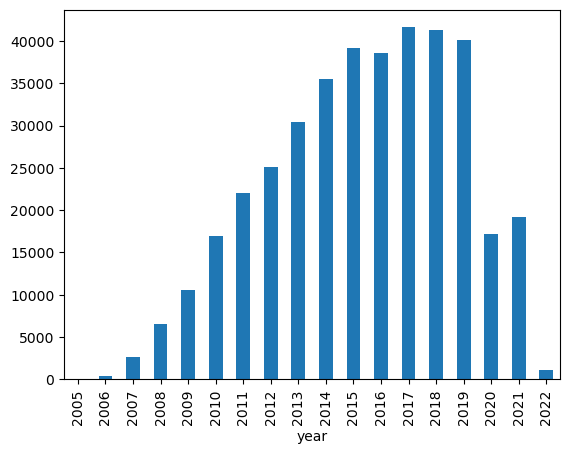

In [9]:

df_shack['date']=pd.to_datetime(df_shack['date'])
df_shack['year']=df_shack['date'].dt.year


review_counts = df_shack.groupby('year').size()
print(review_counts)
review_counts.plot(kind='bar')
# plt.xlabel('Year')
# plt.ylabel('Number of reviews')
# plt.title('Review Count Per Year')
# plt.xticks(rotation=45, ha = 'right')
# plt.tight_layout()
# plt.show()

df_shack.head()


year
2005       46
2006      422
2007     2656
2008     6719
2009    10991
2010    17575
2011    22656
2012    26093
2013    31611
2014    36596
2015    40735
2016    40513
2017    43489
2018    42912
2019    41610
2020    17807
2021    19898
2022     1076
dtype: int64


<Axes: xlabel='year'>

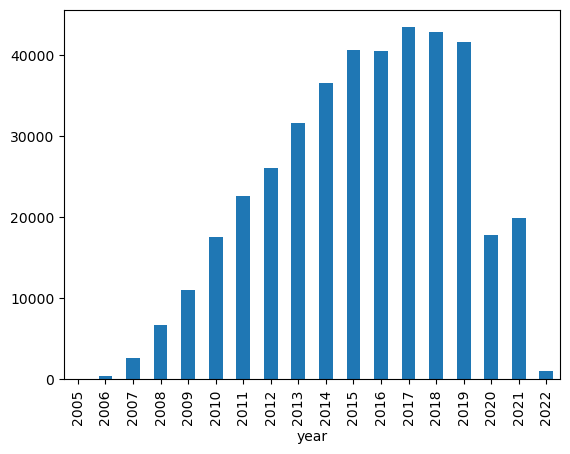

In [12]:
df_colombe['date']=pd.to_datetime(df_colombe['date'])
df_colombe['year']=df_colombe['date'].dt.year


review_counts = df_colombe.groupby('year').size()
print(review_counts)
review_counts.plot(kind='bar')
# plt.xlabel('Year')
# plt.ylabel('Number of reviews')
# plt.title('Review Count Per Year')
# plt.xticks(rotation=45, ha = 'right')
# plt.tight_layout()
# plt.show()


year
2005       53
2006      423
2007     2558
2008     6364
2009    10170
2010    16193
2011    21037
2012    24160
2013    28991
2014    33301
2015    36488
2016    36006
2017    37923
2018    37702
2019    35937
2020    15395
2021    17387
2022      920
dtype: int64


<Axes: xlabel='year'>

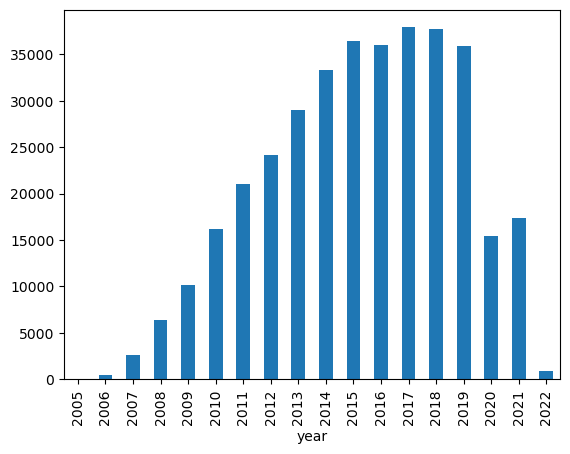

In [14]:
df_joes['date']=pd.to_datetime(df_joes['date'])
df_joes['year']=df_joes['date'].dt.year


review_counts = df_joes.groupby('year').size()
print(review_counts)
review_counts.plot(kind='bar')